# Exploration 11. CIFAR-10 Image Generation
---
# (프로젝트) CIFAR-10 이미지 생성하기

## [루브릭]
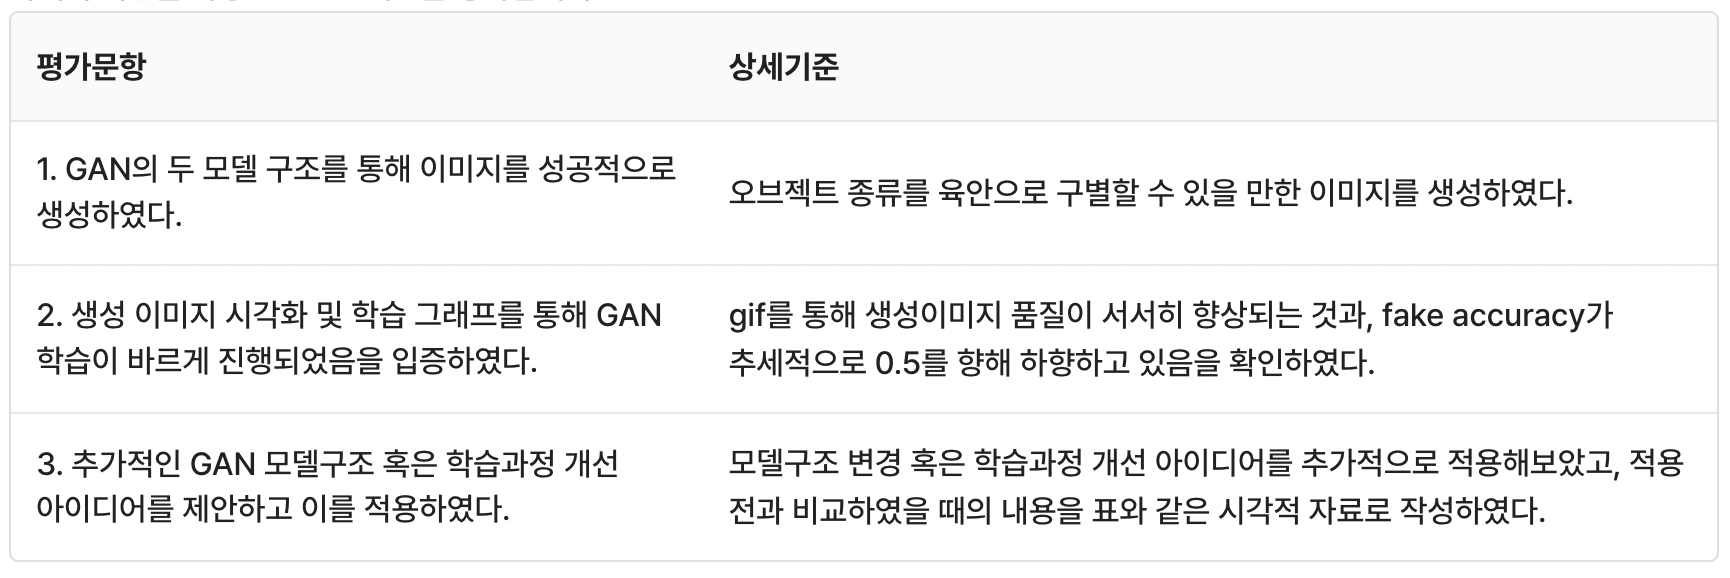

## STEP 1. 데이터셋 구성하기

In [2]:
import os
import glob
import time

import PIL
import imageio
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
cifar10 = tf.keras.datasets.cifar10

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
print("max pixel : ", train_x.max())
print("min pixel : ", train_x.min())

max pixel :  255
min pixel :  0


In [4]:
train_x = (train_x - 127.5) / 127.5

In [5]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


In [6]:
train_x.shape

(50000, 32, 32, 3)

In [7]:
train_x[0].shape

(32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


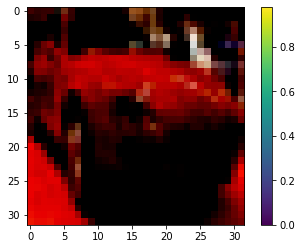

In [13]:
plt.imshow(train_x[5])
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

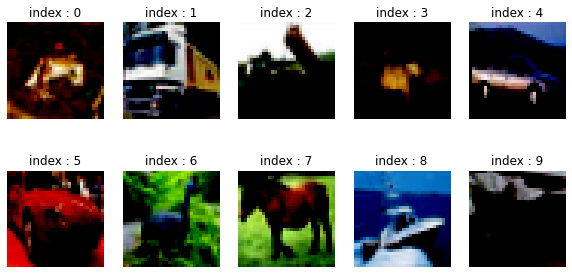

In [9]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i])
    plt.title(f"index : {i}")
    plt.axis('off')
plt.show()

In [14]:
BUFFER_SIZE = 50000
BATCH_SIZE = 256

In [15]:
type(train_x)

numpy.ndarray

In [16]:
train_x.shape

(50000, 32, 32, 3)

In [17]:
# make a dataset from a numpy array
train_dataset = tf.data.Dataset.from_tensor_slices(train_x).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [18]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

## STEP 2. 생성자 모델 구현하기

In [19]:
def make_generator_model():
    
    # Start
    model = tf.keras.Sequential()
    
    # First : Dense Layer
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,))) # input_shape 형태 규정 방법 확인
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Second : Reshape Layer
    model.add(layers.Reshape((8, 8, 256)))
    
    # Third : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Fourth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(64, kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # Fifth : Conv2DTranspose Layer
    model.add(layers.Conv2DTranspose(3, kernel_size=(3,3), strides=(2, 2), padding='same', use_bias=False \
                                    , activation='tanh'))
    return model

In [20]:
generator = make_generator_model()

generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 128)         294912    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 128)         0

In [21]:
noise = tf.random.normal([1, 100])

In [22]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.47429   ,  0.18140467,  0.5306239 , -0.9127327 , -0.5144187 ,
        -1.0125201 ,  0.12713769, -0.7737915 ,  0.29348925,  1.2612255 ,
         1.9699047 , -0.05983155,  0.62463474,  0.83830655, -2.3687592 ,
         1.9596947 ,  0.69895935,  0.36278033,  0.7674893 , -0.5035117 ,
         0.14889994, -1.2097485 , -0.02967839,  0.60894656, -0.6310254 ,
        -0.5902392 , -0.62095916, -0.38181883,  0.04457026,  1.5075113 ,
        -0.988513  ,  1.7863495 ,  0.11722239,  1.1740398 , -0.00985424,
        -0.49733564, -0.09886971,  1.6137412 , -0.43991232, -0.28725487,
        -0.58916783,  0.8178639 , -0.04455694,  0.3870322 , -0.73867047,
        -0.51089597,  1.1220108 ,  1.9411517 ,  0.72883314,  0.18716843,
        -0.17262132, -1.4691626 ,  0.9024416 ,  0.30540493, -0.81362224,
        -1.4731588 , -0.03856253,  1.3713033 ,  1.4946128 , -1.6051791 ,
         0.62443084, -0.93575656, -1.9264691 , -0.7086456 ,  0.21431656,
 

In [23]:
generated_image = generator(noise, training=False)
generated_image.shape

TensorShape([1, 32, 32, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


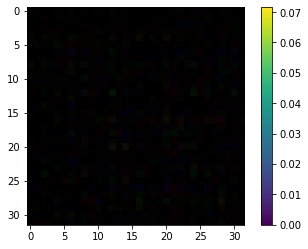

In [24]:
plt.imshow(generated_image[0]) # 배열 index 의미 확인 필요
plt.colorbar()
plt.show()

## STEP 3. 판별자 모델 구현하기

In [25]:
def make_discriminator_model():

    # Start
    model = tf.keras.Sequential()

    # First: Conv2D Layer
    model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=[32, 32, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Second: Conv2D Layer
    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Third: Flatten Layer
    model.add(layers.Flatten())

    # Fourth: Dense Layer
    model.add(layers.Dense(3))

    return model

In [26]:
discriminator = make_discriminator_model()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 64)        1792      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

In [27]:
decision = discriminator(generated_image, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.00203386, -0.00423441, -0.00118606]], dtype=float32)>

In [28]:
type(generated_image)

tensorflow.python.framework.ops.EagerTensor

In [29]:
generated_image.shape

TensorShape([1, 32, 32, 3])

In [30]:
type(train_x[0])

numpy.ndarray

In [31]:
train_x[0].shape

(32, 32, 3)

In [32]:
train_new = train_x[0][np.newaxis, :, : , :]

In [33]:
train_new.shape

(1, 32, 32, 3)

In [34]:
real_img = tf.convert_to_tensor(train_new)

In [35]:
decision = discriminator(real_img, training=False)
decision

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.00900134, -0.05951685,  0.11410692]], dtype=float32)>

## STEP 4. 손실함수와 최적화 함수 구현하기

In [36]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [56]:
# cross_entropy 내용 확인
# BinaryCrossentropy는 last layer activation으로 sigmoid 함수로 사용하며 0, 1 이진 분류를 하는 데 사용
# BinaryCrossentropy 계산식 : l=−(ylog(p)+(1−y)log(1−p)) (p는 예측확률, y는 지표로 0 또는 1)

In [37]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [57]:
# generator_loss 내용 확인
# fake image를 넣고 fake image 인지 판별한 결과값과 비교하여 1(True)로 출력되었을 때 CrossEntropy 값이 떨어지게 됨

In [38]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [58]:
# discriminator_loss 내용 확인
# real image를 넣고 판별한 값은 1(True)이 나올 수록 loss가 떨어지고, fake image를 넣고 판별한 값은 0이 나올 수록 loss가 떨어짐

In [39]:
def discriminator_accuracy(real_output, fake_output):
    real_accuracy = tf.reduce_mean(tf.cast(tf.math.greater_equal(real_output, tf.constant([0.5])), tf.float32))
    fake_accuracy = tf.reduce_mean(tf.cast(tf.math.less(fake_output, tf.constant([0.5])), tf.float32))
    return real_accuracy, fake_accuracy

In [52]:
# discriminator_accuracy 내용 확인
# tf.constanct([0.5]) : 0.5인 상수 텐서를 생성
# tf.math.greater_equal(x,y) : x가 보다 클 때 true 값을 배열로 반환
# tf.cast(x, tf.float32) : x를 tf.float32 형태로 변환
# tf.reduce_mean() : 전체 원소의 평균값 계산
# real_accuracy : 진짜 이미지를 넣고 판별했을 때 0.5보다 큰 원소들의 평균
# fake_accuracy : 가짜 이미지를 넣고 판별했을 때 0.5보다 작은 원소들의 평균

In [40]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## STEP 5. 훈련과정 상세 기능 구현하기

In [41]:
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])
seed.shape

TensorShape([16, 100])

In [42]:
@tf.function
def train_step(images):  #(1) 입력데이터
    noise = tf.random.normal([BATCH_SIZE, noise_dim])  #(2) 생성자 입력 노이즈

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  #(3) tf.GradientTape() 오픈
        generated_images = generator(noise, training=True)  #(4) generated_images 생성

        #(5) discriminator 판별
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        #(6) loss 계산
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #(7) accuracy 계산
        real_accuracy, fake_accuracy = discriminator_accuracy(real_output, fake_output) 
    
    #(8) gradient 계산
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    #(9) 모델 학습
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, real_accuracy, fake_accuracy  #(10) 리턴값

In [43]:
def generate_and_save_images(model, epoch, it, sample_seeds):

    predictions = model(sample_seeds, training=False)

    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')
   
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/generated_samples/01/sample_epoch_{:04d}_iter_{:03d}.png'
                    .format(os.getenv('HOME'), epoch, it))

    plt.show()

In [44]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.

def draw_train_history(history, epoch):
    # summarize history for loss  
    plt.subplot(211)  
    plt.plot(history['gen_loss'])  
    plt.plot(history['disc_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('batch iters')  
    plt.legend(['gen_loss', 'disc_loss'], loc='upper left')  

    # summarize history for accuracy  
    plt.subplot(212)  
    plt.plot(history['fake_accuracy'])  
    plt.plot(history['real_accuracy'])  
    plt.title('discriminator accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('batch iters')  
    plt.legend(['fake_accuracy', 'real_accuracy'], loc='upper left')  
    
    # training_history 디렉토리에 epoch별로 그래프를 이미지 파일로 저장합니다.
    plt.savefig('{}/aiffel/dcgan_newimage/cifar10/training_history/01/train_history_{:04d}.png'
                    .format(os.getenv('HOME'), epoch))
    plt.show()

In [45]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints/01'

checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [46]:
def train(dataset, epochs, save_every):
    start = time.time()
    history = {'gen_loss':[], 'disc_loss':[], 'real_accuracy':[], 'fake_accuracy':[]}

    for epoch in range(epochs):
        epoch_start = time.time()
        for it, image_batch in enumerate(dataset):
            gen_loss, disc_loss, real_accuracy, fake_accuracy = train_step(image_batch)
            history['gen_loss'].append(gen_loss)
            history['disc_loss'].append(disc_loss)
            history['real_accuracy'].append(real_accuracy)
            history['fake_accuracy'].append(fake_accuracy)

            if it % 50 == 0:
                display.clear_output(wait=True)
                generate_and_save_images(generator, epoch+1, it+1, seed)
                print('Epoch {} | iter {}'.format(epoch+1, it+1))
                print('Time for epoch {} : {} sec'.format(epoch+1, int(time.time()-epoch_start)))

        if (epoch + 1) % save_every == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epochs, it, seed)
        print('Time for training : {} sec'.format(int(time.time()-start)))

        draw_train_history(history, epoch)

## STEP 6. 학습 과정 진행하기

In [47]:
save_every = 5
EPOCHS = 100

# 사용가능한 GPU 디바이스 확인
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

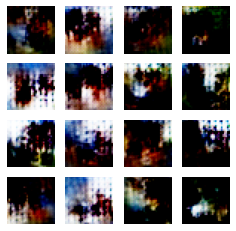

Time for training : 1064 sec


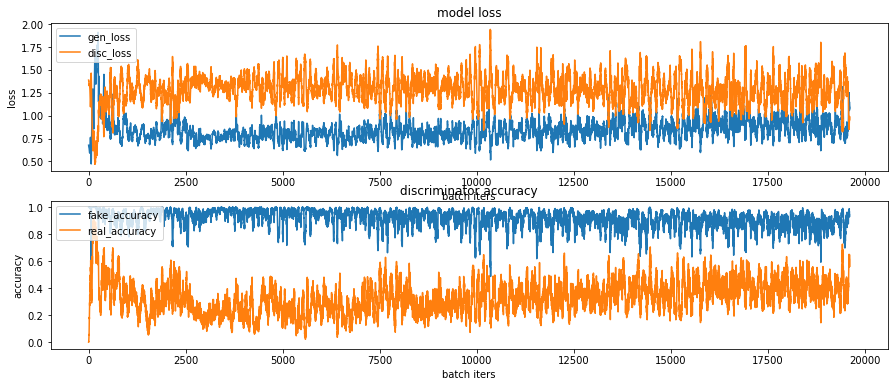

CPU times: user 18min 39s, sys: 2min 43s, total: 21min 23s
Wall time: 17min 46s


In [48]:
%%time
train(train_dataset, EPOCHS, save_every)

이미지 생성 과정을 살펴보면 아래와 같이 나옵니다. 하지만 아직 특정한 물체를 알아볼 수 있는 수준이 아닌 것 같습니다.

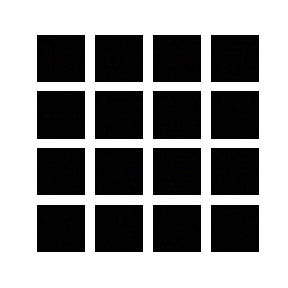

In [49]:
anim_file = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('{}/aiffel/dcgan_newimage/cifar10/generated_samples/01/sample*.png'.format(os.getenv('HOME')))
    filenames = sorted(filenames)
    last = -1
    for i, filename in enumerate(filenames):
        frame = 2*(i**0.5)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

!ls -l ~/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif

-rw-r--r-- 1 root root 1263900 Dec 19 00:29 /aiffel/aiffel/dcgan_newimage/cifar10/cifar_10_dcgan_01.gif


## STEP 7. 모델 개선하기

아쉽게도 최종 이미지를 통해 이미지가 어떤 것을 나타내는지 분간하기 힘들고, loss나 accuracy가 초기 대비 

In [1]:
checkpoint_dir = os.getenv('HOME')+'/aiffel/dcgan_newimage/cifar10/training_checkpoints/01'

latest = tf.train.latest_checkpoint(checkpoint_dir)
checkpoint.restore(latest)

generator = checkpoint.generator
discriminator = checkpoint.discriminator

# 로드한 모델이 정상적으로 이미지를 생성하는지 확인해 봅니다. 
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

np_generated = generated_image.numpy()
np_generated = (np_generated * 127.5) + 127.5   # reverse of normalization
np_generated = np_generated.astype(int)
plt.imshow(np_generated[0])
plt.show()  # 정상적으로 모델이 로드되었다면 랜덤 이미지가 아니라 CIFAR-10 이미지가 그려질 것입니다.

NameError: name 'os' is not defined

## 회고  
- accuracy를 구할 때 판별결과를 0.5값을 기준으로 나누어서 측정하였는데, 0.5가 의미하는 것이 무엇인지 좀 더 고민해볼 필요가 있겠습니다.


[참고]  
- https://meissa.tistory.com/50
- GAN,DCGAN,WGAN,CGAN: https://velog.io/@tobigs-gm1/basicofgan
- Binary CrossEntropy : https://blog.naver.com/PostView.nhn?blogId=intelliz&logNo=221707985006&parentCategoryNo=&categoryNo=16&viewDate=&isShowPopularPosts=true&from=search